In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/UCLA admission predictor/Admission_Predict.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
# rows and cols
print(f'rows : {df.shape[0]}')
print(f'columns : {df.shape[1]}')

rows : 400
columns : 9


In [ ]:
#statistical information about dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [ ]:
#relation between columns 
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
#na values or not or how many
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
#EDA and visualization

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

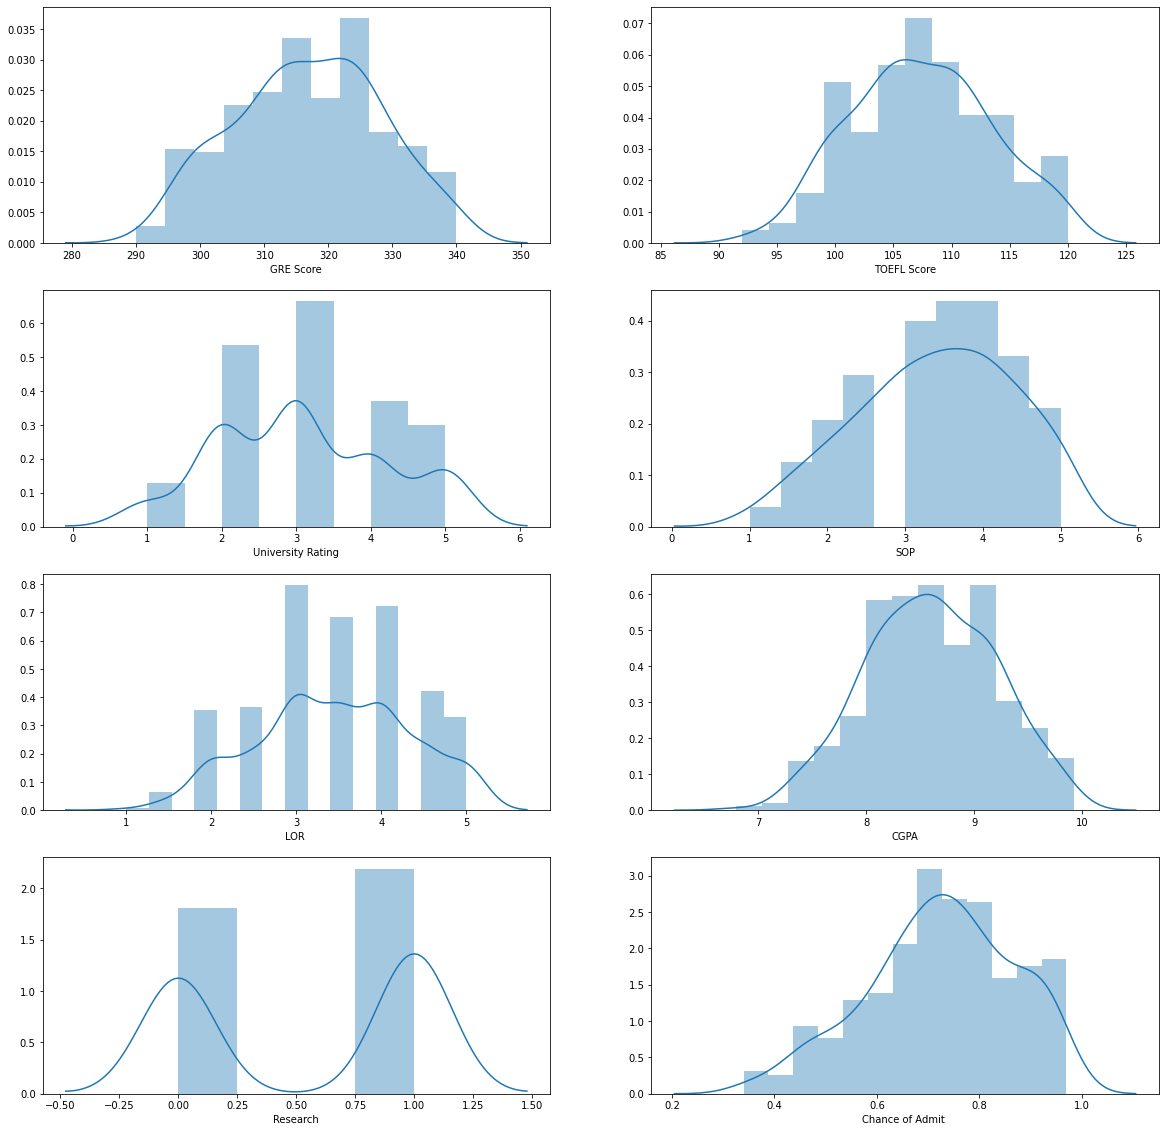

In [ ]:
# distribution plot
numcols=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

fig, axes=plt.subplots(4,2, figsize=(20,20))
for i,j in enumerate(numcols):
  ax=axes[int(i/2), i%2]
  sns.distplot(df[j], ax=ax)


In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Text(0, 0.5, 'Chance_Admit')

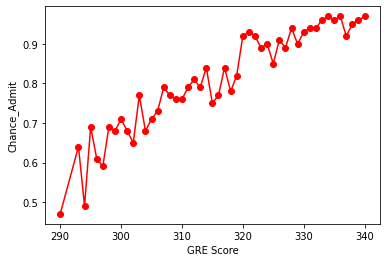

In [ ]:
#gre with admission
gre_admit=df.groupby('GRE Score').max()['Chance of Admit ']
gre_admit.plot(kind='line', color='r', marker='o')
plt.ylabel('Chance_Admit')

it looks like score>326 has 90+ percent chances of admission

Text(0, 0.5, 'Chance_Admit')

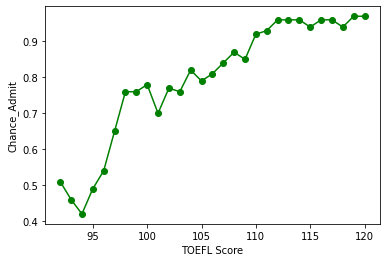

In [ ]:
#toefl with admission
toefl_admit=df.groupby('TOEFL Score').max()['Chance of Admit ']
toefl_admit.plot(kind='line', color='g', marker='o')
plt.ylabel('Chance_Admit')

Text(0, 0.5, 'Chance_Admit')

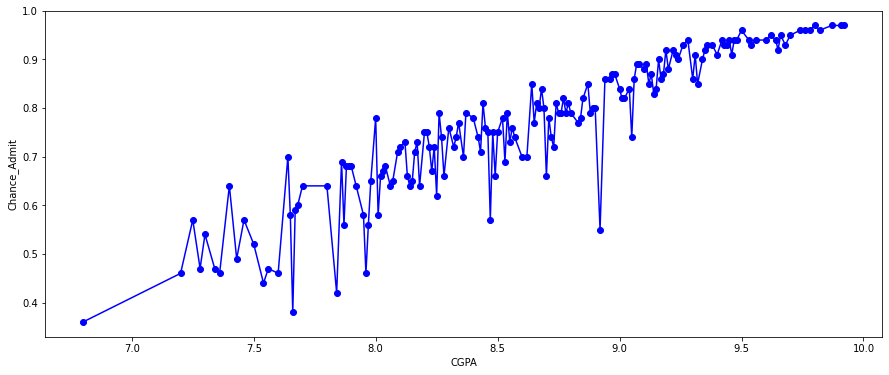

In [ ]:
#cgpa with admission
cgpa_admit=df.groupby('CGPA').max()['Chance of Admit ']
cgpa_admit.plot(kind='line', color='b', marker='o', figsize=(15,6))
plt.ylabel('Chance_Admit')

it looks like GRE and TOEFL scores are more related with chances of admission than CGPA

Text(0, 0.5, 'Chance_Admit')

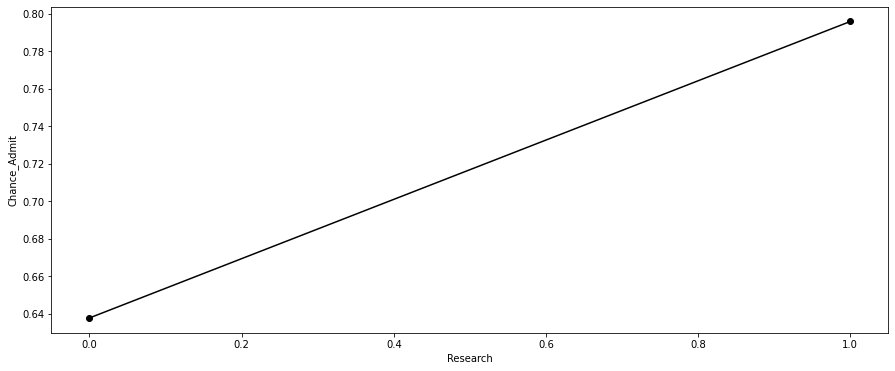

In [ ]:
#research with admission
research_admit=df.groupby('Research').mean()['Chance of Admit ']
research_admit.plot(kind='line', color='k', marker='o', figsize=(15,6))
plt.ylabel('Chance_Admit')

mean chances of admission with no reserch is 64% but with research project is ~80%

In [ ]:
# model building

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR


In [56]:
y=df['Chance of Admit ']
X=df.drop(['Chance of Admit ','Serial No.'],axis=1)

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [58]:
# linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
score_lr=lr.score(X_test,y_test)
print(score_lr)

0.8212082591486993


In [59]:
# lasso regression
L=Lasso()
L.fit(X_train,y_train)
pred_L=L.predict(X_test)
score_L=L.score(X_test,y_test)
print(score_L)

0.21225769113829052


In [60]:
# Ridge regression
R=Ridge()
R.fit(X_train,y_train)
pred_R=R.predict(X_test)
score_R=R.score(X_test,y_test)
print(score_R)

0.8204337208459433


In [61]:
# Decision tree regression
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred_dtr=dtr.predict(X_test)
score_dtr=dtr.score(X_test,y_test)
print(score_dtr)

0.584291112395209


In [62]:
# random forest regression
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_test)
score_rfr=rfr.score(X_test,y_test)
print(score_rfr)

0.8106470074635672


In [74]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
# adaboost regression
adb=AdaBoostRegressor()
adb.fit(X_train,y_train)
pred_adb=adb.predict(X_test)
score_adb=adb.score(X_test,y_test)
print(score_adb)

0.7935463661162526


In [64]:
# xgboost regression
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
pred_xgb=xgb.predict(X_test)
score_xgb=xgb.score(X_test,y_test)
print(score_xgb)

[08:52:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8146534207115437


In [65]:
# Support vector regression
svr=SVR()
svr.fit(X_train,y_train)
pred_svr=svr.predict(X_test)
score_svr=svr.score(X_test,y_test)
print(score_svr)

0.6348008667533296


In [66]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [76]:
# hyperparameter tuning of rfr
params={'n_estimators':[x for x in range(100,1200,100)],
        'ccp_alpha':[0.001,0.01,0.1,1,0,10],
        'max_depth':[x for x in range(1,32,32)],
        'min_samples_leaf':[1,2,3,4,5],
        'min_samples_split':[2,4,6,8,10]}
random_rfr=RandomizedSearchCV(rfr, param_distributions=params, cv=5)
random_rfr.fit(X_train,y_train)
random_rfr_score=random_rfr.score(X_test,y_test)


In [77]:
random_rfr_score

0.6223634235632753

In [72]:
#prediction

In [71]:
lr.predict([[340,120,1,5,4,9.5,0]])[0]*100

88.8213710306331

In [78]:
## pickle file 
pd.to_pickle(lr, 'admit_ucla_64bit.pickle')